In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
from tqdm import tqdm


import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
from maze_utils.MM_Maze_Utils import *
from maze_utils.MM_Plot_Utils import plot, hist
from maze_utils.MM_Traj_Utils import *

from environment import Environment, Status
from agent import Agent


# Tony's code, from Tony's repo mouse-maze-analysis
# from data_loader import DataLoader
# from query_data import QueryData

# Markus's code
# from MM_Plot_Utils import plot, hist
# from MM_Maze_Utils import *
# from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
def plot_path(maze, path):
    # plot maze
    ax = PlotMazeCells(maze)

    colours = np.linspace(0, 1, len(path) - 1)
    cmap = plt.get_cmap("jet")

    # plot path arrows
    for i in range(len(path) - 1):
        cur_cell = path[i]
        next_cell = path[i + 1]
        x = maze.xc[cur_cell]
        y = maze.yc[cur_cell]
        dx = 0.8 * (maze.xc[next_cell] - x)
        dy = 0.8 * (maze.yc[next_cell] - y)

        ax.arrow(x, y, dx, dy, head_width=0.2, head_length=0.2, fc=cmap(colours[i]),
                  length_includes_head=True, alpha=0.5, width=0.1)

  0%|▎                                                                                                                                       | 1/500 [00:00<06:24,  1.30it/s]

plotted!


  1%|█▋                                                                                                                                      | 6/500 [00:02<02:32,  3.23it/s]

plotted!
plotted!


 20%|██████████████████████████▊                                                                                                          | 101/500 [00:02<00:03, 105.68it/s]

plotted!
plotted!
plotted!


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 154.78it/s]

plotted!


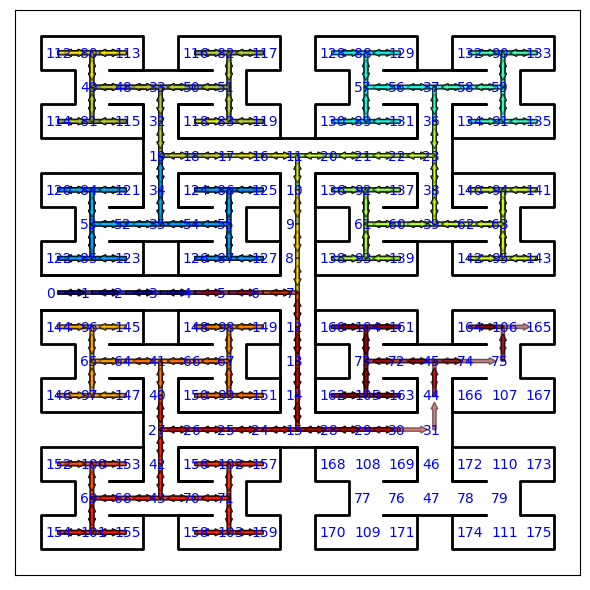

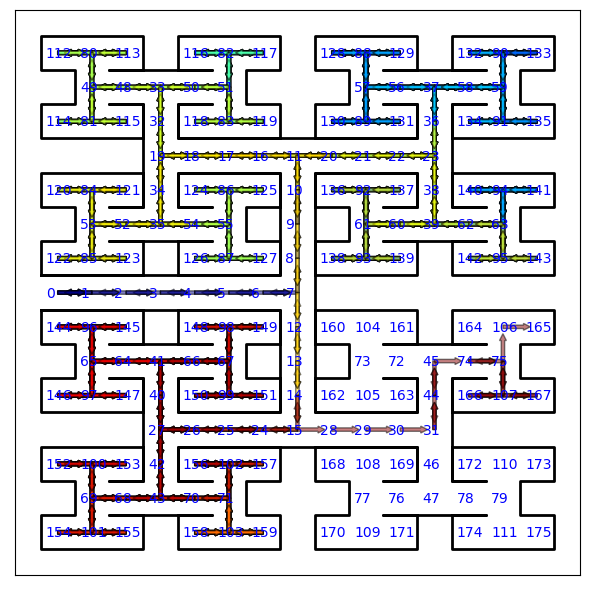

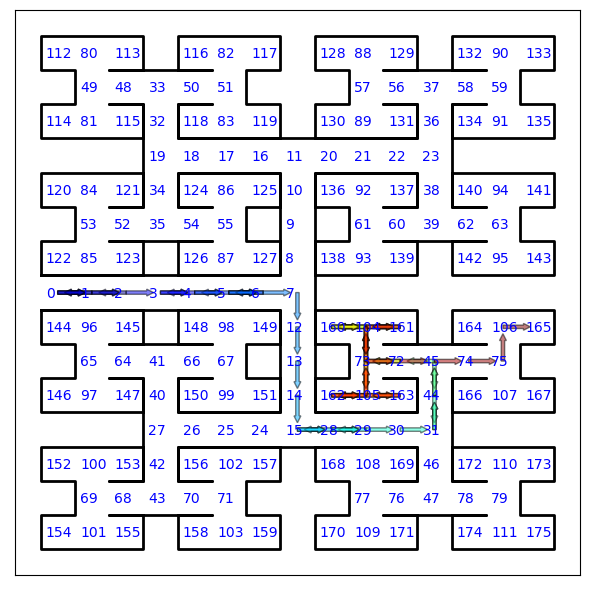

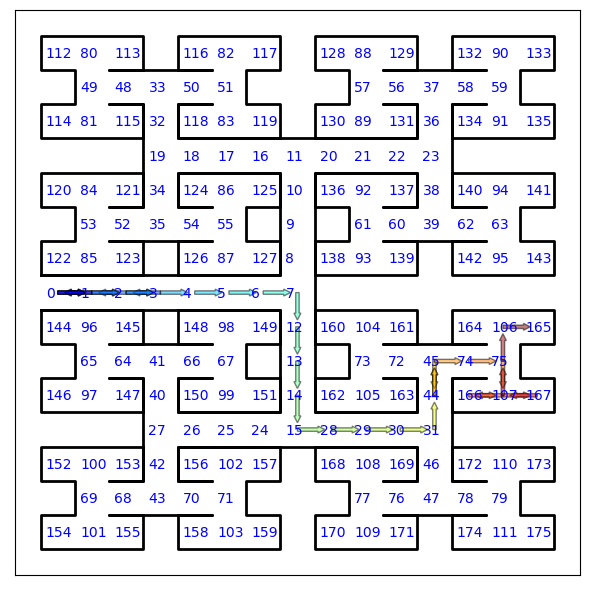

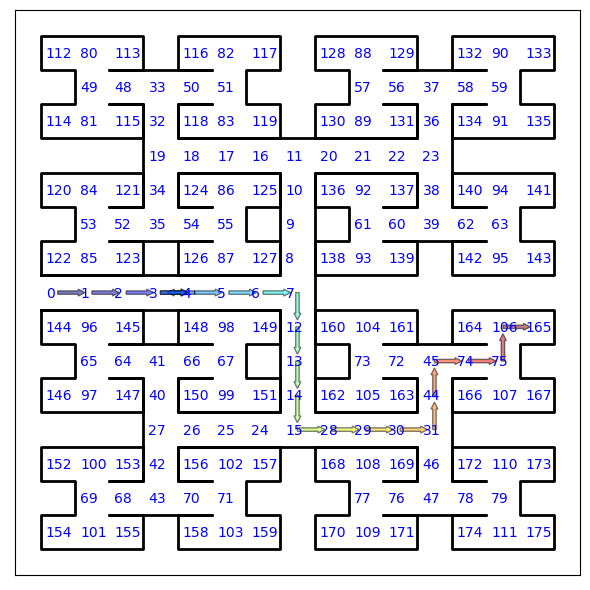

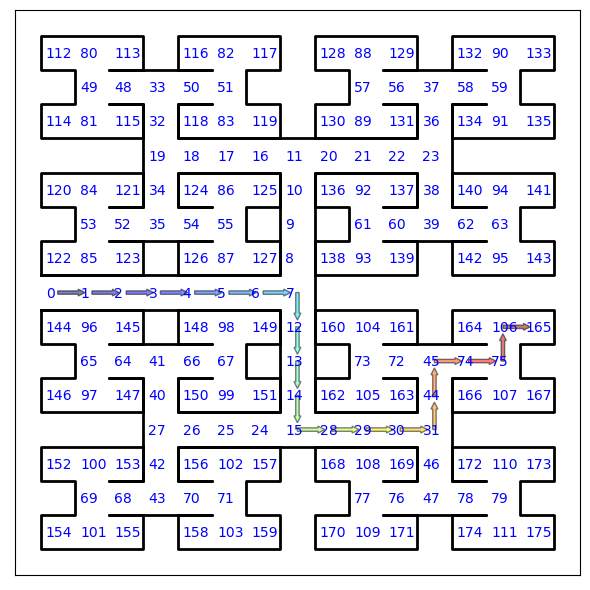

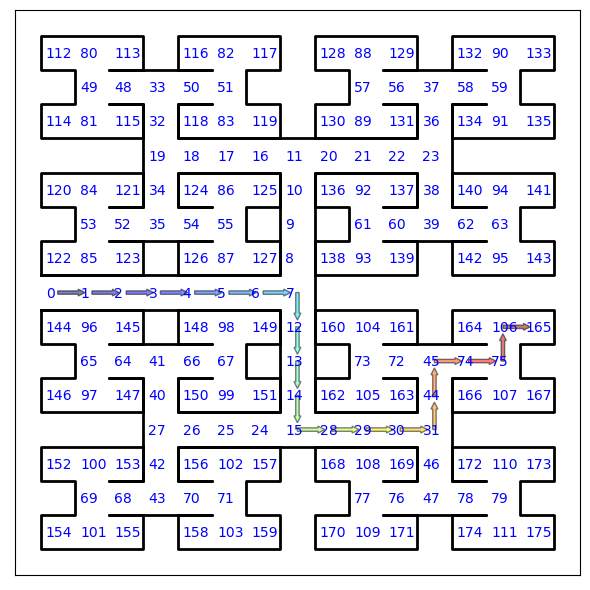

In [6]:

# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
# Define maze
maze = NewMaze(6)
env = Environment(maze)
agent = Agent(env, learning_rate=0.1, epsilon=0.1)

policy = 'SARSA'

n_episodes = 500
save_episodes = [0, 1, 5, 10, 50, 100, 200, 500, 1000, 10000]

for episode in tqdm(range(n_episodes)):
    obs = env.reset()
    done = False
    path = [obs]
    while not done:
        # Retrieve an action from the agent
        action = agent.get_action(obs)
        next_obs, reward, status = env.step(action)  # Let environment process agent's action
        
        next_action = agent.get_action(next_obs)
        

        # Update the agent's policy with environment's feedback
        
        if policy == 'Q':
            agent.Q_update(obs, action, reward, next_obs)
        elif policy == 'SARSA': 
            agent.SARSA_update(obs, action, reward, next_obs, next_action)
        
        # Update bookkeeping variables
        done = status == Status.WATER_REACHED
        obs = next_obs
        path.append(obs)
        # print(obs)
    if episode in save_episodes:
        agent.q_history[episode] = (agent.q_values.copy(), path)
        plot_path(maze, path)
        print("plotted!")




In [ ]:

# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
# Define maze
maze = NewMaze(6)
env = Environment(maze)
agent = Agent(env, learning_rate=0.1, epsilon=0.1)

policy = 'Q'

n_episodes = 500
save_episodes = [0, 1, 5, 10, 50, 100, 200, 500, 1000, 10000]

for episode in tqdm(range(n_episodes)):
    obs = env.reset()
    done = False
    path = [obs]
    while not done:
        # Retrieve an action from the agent
        action = agent.get_action(obs)
        next_obs, reward, status = env.step(action)  # Let environment process agent's action
        
        next_action = agent.get_action(next_obs)
        

        # Update the agent's policy with environment's feedback
        
        if policy == 'Q':
            agent.Q_update(obs, action, reward, next_obs)
        elif policy == 'SARSA': 
            agent.SARSA_update(obs, action, reward, next_obs, next_action)
        
        # Update bookkeeping variables
        done = status == Status.WATER_REACHED
        obs = next_obs
        path.append(obs)
        # print(obs)
    if episode in save_episodes:
        agent.q_history[episode] = (agent.q_values.copy(), path)
        plot_path(maze, path)
        print("plotted!")


